# Steel Plate Defect Prediction

## Background

I came across this project looking for another Final project idea for this submission as I was not happy with my other project.

The data from this competition has been synthetically created by sophisticated deep-learning CNN model. The idea is to predict the 7 possible defect categories in the dataset.

**Submission File** \
For each id in the test set, you must predict the probability for each of 7 defect categories: Pastry, Z_Scratch, K_Scatch, Stains, Dirtiness, Bumps, Other_Faults. The file should contain a header and have the format:

In [90]:
import pandas as pd
from io import StringIO

# Define the CSV data as a string
data = """
id,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
19219,0.5,0.5,0.5,0.5,0.5,0.5,0.5
19220,0.5,0.5,0.5,0.5,0.5,0.5,0.5
19221,0.5,0.5,0.5,0.5,0.5,0.5,0.5
"""

# Use StringIO to simulate reading from a file
data_io = StringIO(data)

# Create a DataFrame
df = pd.read_csv(data_io)
print(df)

      id  Pastry  Z_Scratch  K_Scatch  Stains  Dirtiness  Bumps  Other_Faults
0  19219     0.5        0.5       0.5     0.5        0.5    0.5           0.5
1  19220     0.5        0.5       0.5     0.5        0.5    0.5           0.5
2  19221     0.5        0.5       0.5     0.5        0.5    0.5           0.5


## Using k-means clustering

My idea here is to utilise k-means clustering, of 7 clusters, to cluster the data.

In [91]:
import os
path = r'C:\ml\Scripts\data\finalproj unsup'

In [92]:
train_name = os.path.join(path,'train.csv')
test_name = os.path.join(path,'test.csv')

df_train = pd.read_csv(train_name)
df_test = pd.read_csv(test_name)

print(df_train.head())
print(df_test.head())

   id  X_Minimum  X_Maximum  Y_Minimum  Y_Maximum  Pixels_Areas  X_Perimeter  \
0   0        584        590     909972     909977            16            8   
1   1        808        816     728350     728372           433           20   
2   2         39        192    2212076    2212144         11388          705   
3   3        781        789    3353146    3353173           210           16   
4   4       1540       1560     618457     618502           521           72   

   Y_Perimeter  Sum_of_Luminosity  Minimum_of_Luminosity  ...  \
0            5               2274                    113  ...   
1           54              44478                     70  ...   
2          420            1311391                     29  ...   
3           29               3202                    114  ...   
4           67              48231                     82  ...   

   Orientation_Index  Luminosity_Index  SigmoidOfAreas  Pastry  Z_Scratch  \
0            -0.5000           -0.0104          0.1

In [93]:
# List of columns to exclude from scaling (these are our fault features)
exclude_features = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']
# If multiple faults are present, indicate label to be 'Other_Faults'
# Function to create LABEL column
def create_label(row):
    fault_count = sum(row[exclude_features])
    if fault_count > 1:
        return 'Other_Faults'
    elif fault_count == 1:
        return next(feature for feature in exclude_features if row[feature] == 1)
    else:
        return 'No_Fault'

# Apply the function to create the LABEL column
df_train['LABEL'] = df_train.apply(create_label, axis=1)

# Verify the results
print(df_train['LABEL'].value_counts())
print(len(df_train))
# Optional: Check the rows labeled as 'Other_Faults'
other_faults = df_train[df_train['LABEL'] == 'Other_Faults']
if not other_faults.empty:
    print("\nRows labeled as 'Other_Faults':")
    print(other_faults[exclude_features + ['LABEL']])

LABEL
Other_Faults    6561
Bumps           4761
K_Scatch        3411
Pastry          1465
Z_Scratch       1150
No_Fault         818
Stains           568
Dirtiness        485
Name: count, dtype: int64
19219

Rows labeled as 'Other_Faults':
       Pastry  Z_Scratch  K_Scatch  Stains  Dirtiness  Bumps  Other_Faults  \
1           0          0         0       0          0      0             1   
4           0          0         0       0          0      0             1   
5           0          0         0       0          0      0             1   
11          0          0         0       0          0      0             1   
13          0          0         0       0          0      0             1   
...       ...        ...       ...     ...        ...    ...           ...   
19208       0          0         0       0          0      0             1   
19211       0          0         0       0          0      0             1   
19213       0          0         0       0          0      

## EDA

In [94]:
# Check for missing values
print(df_train.isnull().sum())
print(df_test.isnull().sum())

id                       0
X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
Pastry                   0
Z_Scratch                0
K_Scatch                 0
Stains                   0
Dirtiness                0
Bumps                    0
Other_Faults             0
LABEL                    0
dtype: int64
id             

In [95]:
# Summary of the dataset
print(df_train.info())

# Statistical summary of numerical features
print(df_train.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19219 entries, 0 to 19218
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     19219 non-null  int64  
 1   X_Minimum              19219 non-null  int64  
 2   X_Maximum              19219 non-null  int64  
 3   Y_Minimum              19219 non-null  int64  
 4   Y_Maximum              19219 non-null  int64  
 5   Pixels_Areas           19219 non-null  int64  
 6   X_Perimeter            19219 non-null  int64  
 7   Y_Perimeter            19219 non-null  int64  
 8   Sum_of_Luminosity      19219 non-null  int64  
 9   Minimum_of_Luminosity  19219 non-null  int64  
 10  Maximum_of_Luminosity  19219 non-null  int64  
 11  Length_of_Conveyer     19219 non-null  int64  
 12  TypeOfSteel_A300       19219 non-null  int64  
 13  TypeOfSteel_A400       19219 non-null  int64  
 14  Steel_Plate_Thickness  19219 non-null  int64  
 15  Ed

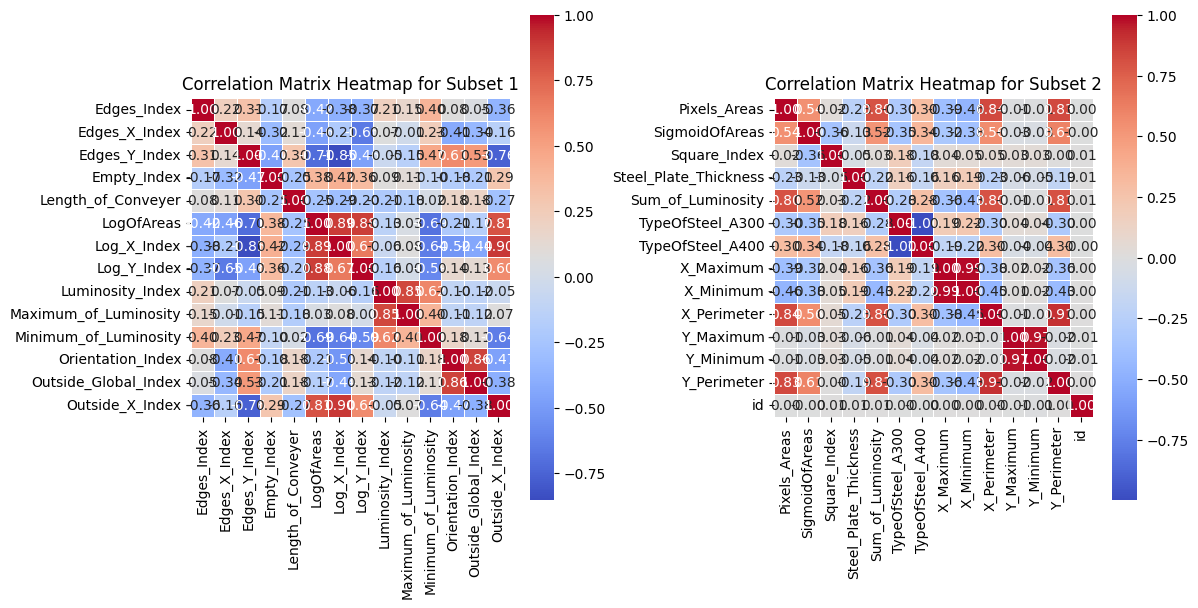

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

# Exclude Y-variables
features_to_include = df_train.columns.difference(['LABEL','Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults'])

# Splitting features into two subsets for demonstration (you can choose a different logic)
half = len(features_to_include) // 2
subset1 = features_to_include[:half]
subset2 = features_to_include[half:]

corr_matrix_subset1 = df_train[subset1].corr()
corr_matrix_subset2 = df_train[subset2].corr()

plt.figure(figsize=(12, 10))

# Heatmap for the first subset
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.heatmap(corr_matrix_subset1, annot=True, fmt=".2f", cmap='coolwarm',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix Heatmap for Subset 1')

# Heatmap for the second subset
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.heatmap(corr_matrix_subset2, annot=True, fmt=".2f", cmap='coolwarm',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix Heatmap for Subset 2')

plt.tight_layout()
plt.show()


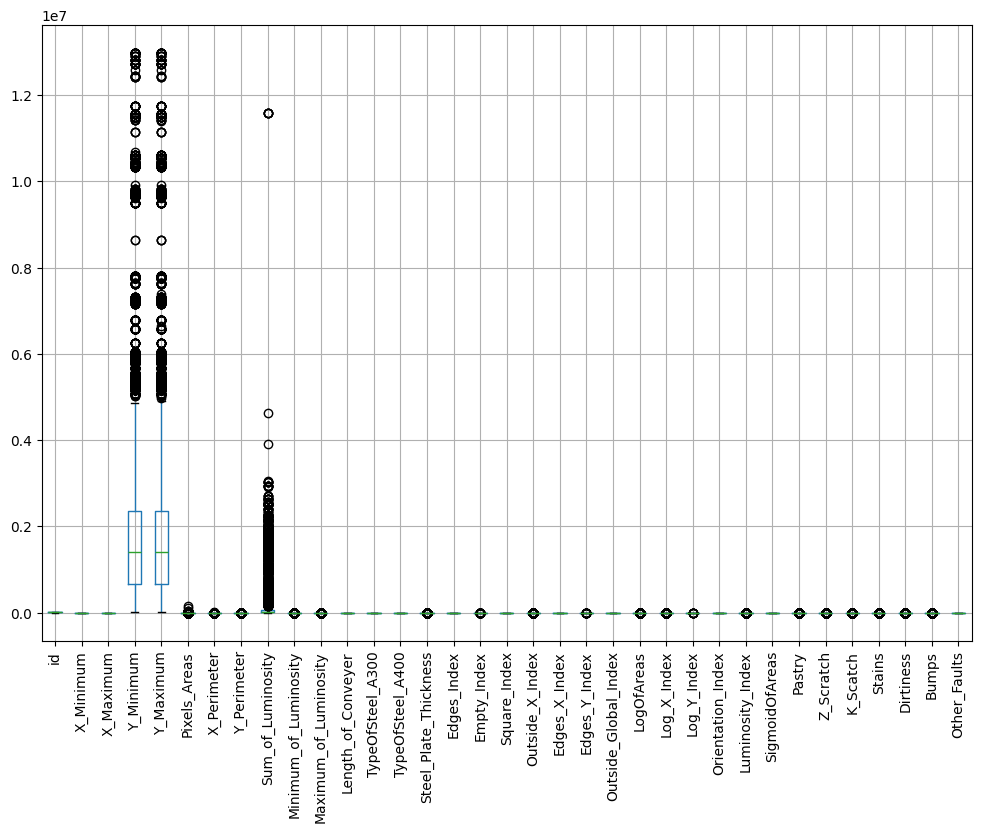

In [97]:
# Box plots to visualize outliers
plt.figure(figsize=(12, 8))
df_train.boxplot(rot=90)
plt.show()

We can see from the box plot above that the data collected is quite well situated but there seems to be a couple of outliers in the 'Sum_of_Luminosity' column and a large spread of data over the 'Y_minimum' and 'Y_maximum' columns.

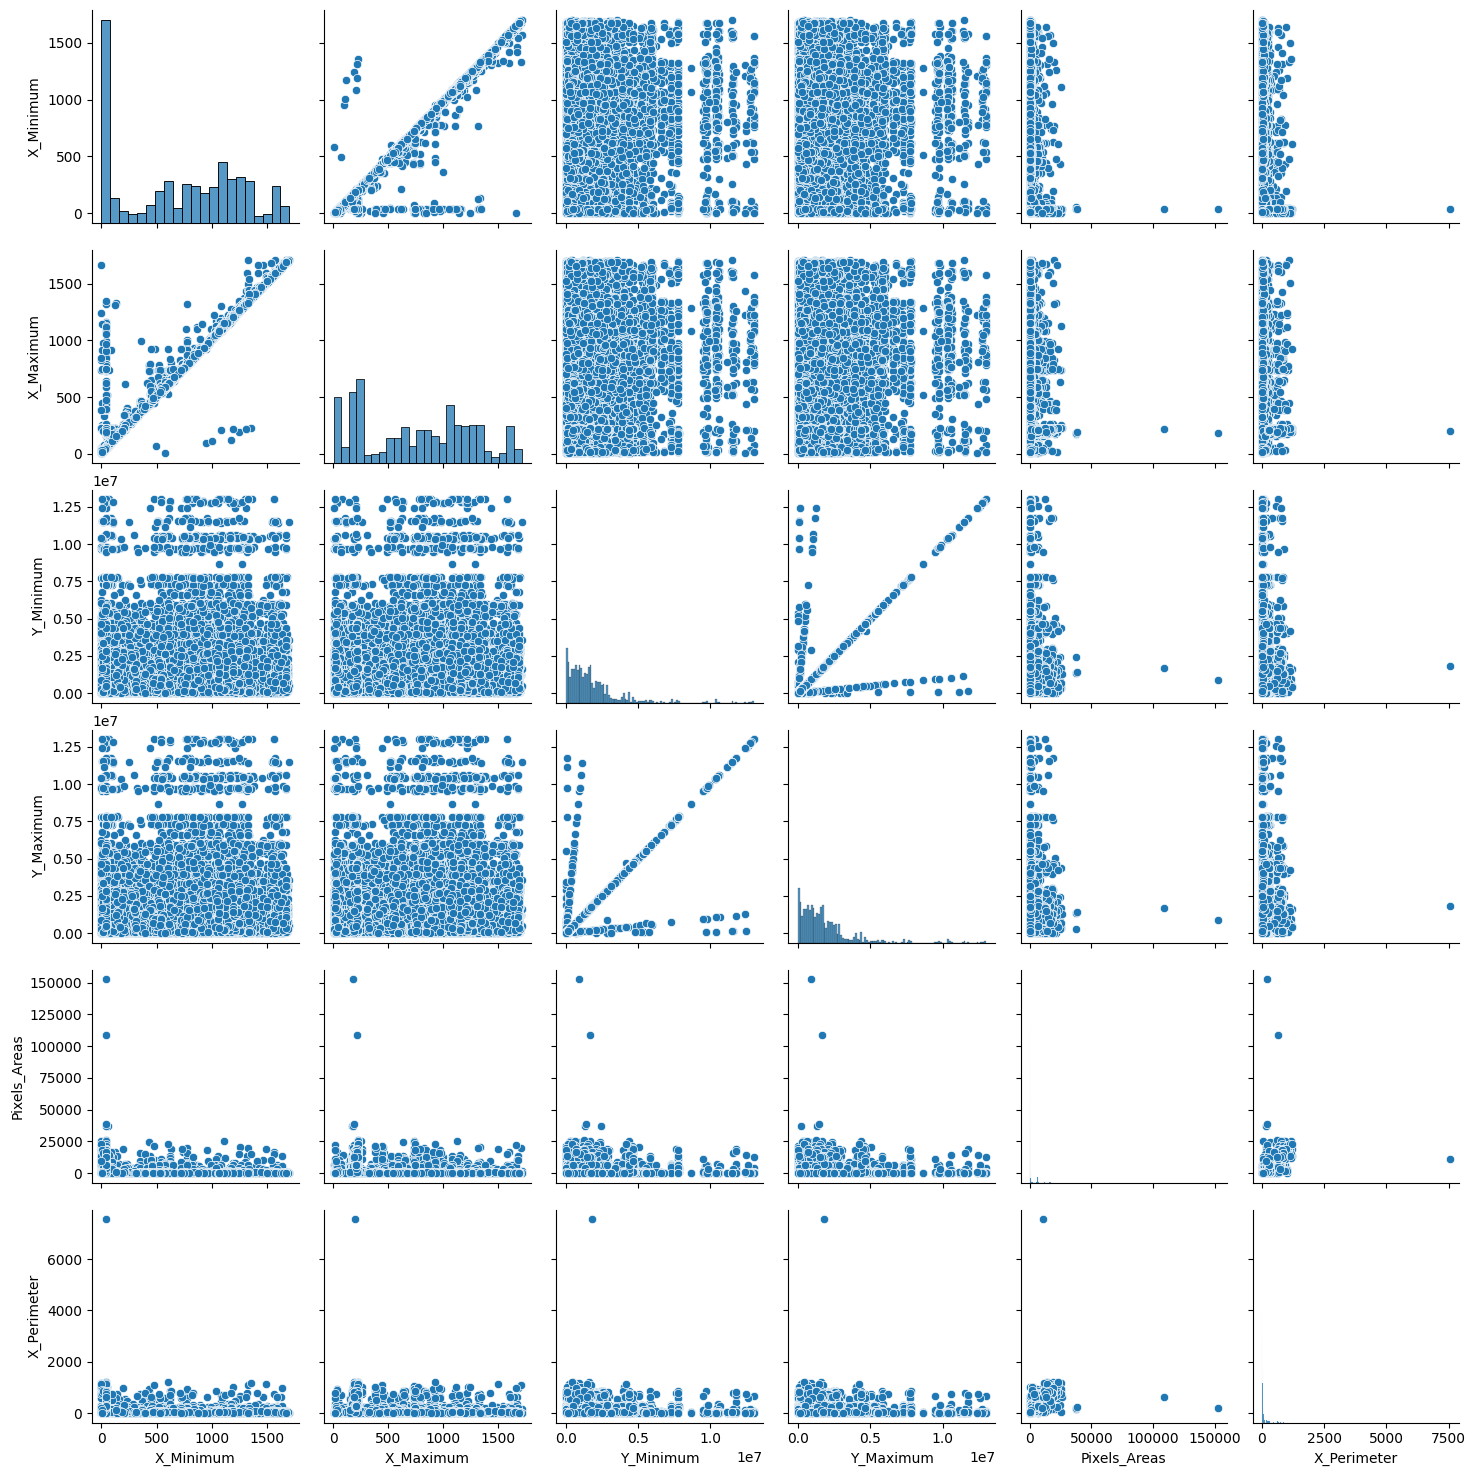

In [98]:
# Select a subset of features to avoid a cluttered pair plot
subset_features = ['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas', 'X_Perimeter']
sns.pairplot(df_train[subset_features])
plt.show()

### Scaling

In [99]:
# List of columns to exclude from scaling
exclude_features = ['LABEL','Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']

# Determine columns to scale by excluding the specified columns
features_to_scale = [col for col in df_train.columns if col not in exclude_features]
print(features_to_scale)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train = df_train[features_to_scale]
X_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test = df_test[features_to_scale]
X_test_scaled = scaler.transform(X_test)

['id', 'X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity', 'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer', 'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness', 'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index', 'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas', 'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index', 'SigmoidOfAreas']


In [100]:
print(X_test_scaled)
print(X_train.head())

[[ 1.73214093  0.57408823  0.55848175 ...  1.16874156 -0.72891455
   1.03939625]
 [ 1.73232118  1.02937737  1.03464974 ...  1.64775614 -0.05748848
   1.01892727]
 [ 1.73250142  1.21939474  1.23672103 ... -1.28477277  0.7884419
   0.23929988]
 ...
 [ 4.04124161 -1.25835648 -1.08809916 ... -0.33966224  0.48430583
   1.2886362 ]
 [ 4.04142185  1.1648353   1.17269845 ...  1.52431146 -1.03471257
   0.63964908]
 [ 4.04160209 -1.2621192  -1.1341154  ...  0.027801    0.27573164
   1.2886362 ]]
   id  X_Minimum  X_Maximum  Y_Minimum  Y_Maximum  Pixels_Areas  X_Perimeter  \
0   0        584        590     909972     909977            16            8   
1   1        808        816     728350     728372           433           20   
2   2         39        192    2212076    2212144         11388          705   
3   3        781        789    3353146    3353173           210           16   
4   4       1540       1560     618457     618502           521           72   

   Y_Perimeter  Sum_of_Lumin

## K-means Clustering & PCA

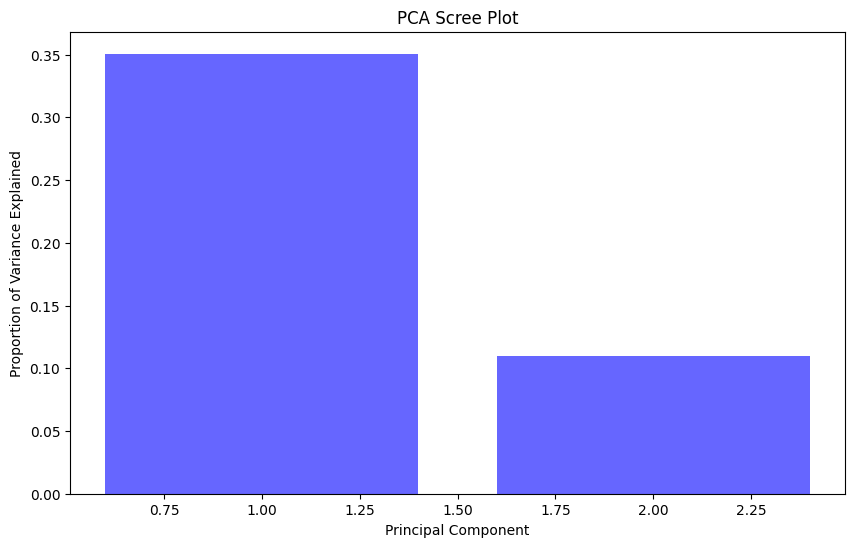

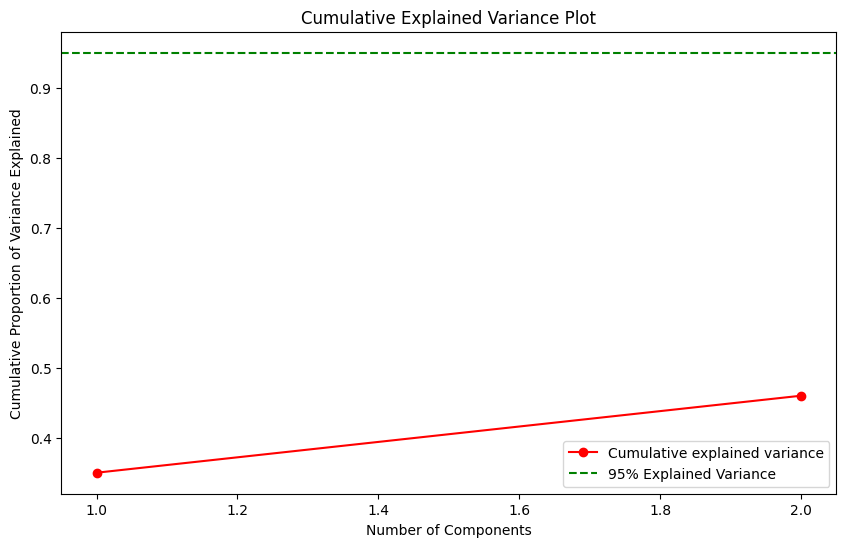

In [101]:
from sklearn.decomposition import PCA

# Fit PCA on the scaled data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Variance explained by each component
explained_variance = pca.explained_variance_ratio_
cumulative_variance = pca.explained_variance_ratio_.cumsum()

# Plotting the scree plot
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.6, color='b', label='Individual explained variance')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.title('PCA Scree Plot')
plt.show()

# Plotting the cumulative variance plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-', color='r', label='Cumulative explained variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Proportion of Variance Explained')
plt.title('Cumulative Explained Variance Plot')
plt.axhline(y=0.95, color='g', linestyle='--', label='95% Explained Variance')
plt.legend(loc='best')
plt.show()

We have used PCA to reduce the dimensions of the data into two-dimensions which we can then cluster by 7, for the 7 different groups. Ideally, the proporition of variance explained would be much greater. I will experiment with this after.

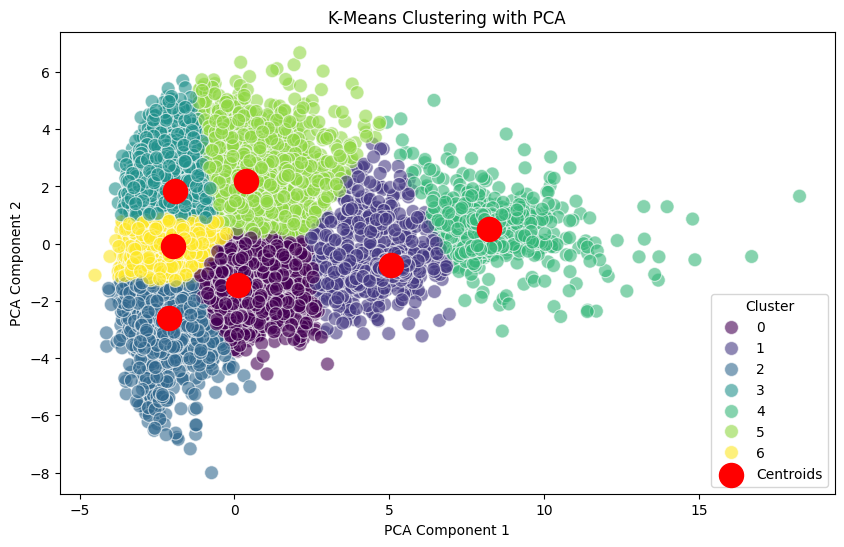

In [102]:
# Re-run k-means on the PCA-transformed data
kmeans_pca = KMeans(n_clusters=7
                    , random_state=42)
clusters_train = kmeans_pca.fit_predict(X_pca)


# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters_train, palette='viridis', s=100, alpha=0.6)
plt.scatter(kmeans_pca.cluster_centers_[:, 0], kmeans_pca.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('K-Means Clustering with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster', loc='best')
plt.show()

We can clearly see some good separation using the PCA and K-means clustering. We now just need to predict! and possibly refine the PCA process.


Cluster-Label Distribution:
LABEL       Bumps  Dirtiness  K_Scatch  No_Fault  Other_Faults    Pastry  \
Cluster                                                                    
0        0.314408   0.010019  0.057252  0.062500      0.438931  0.007156   
1        0.009259   0.001208  0.866345  0.016103      0.095813  0.000403   
2        0.245233   0.016781  0.053394  0.058352      0.371472  0.017162   
3        0.277946   0.028701  0.001511  0.036556      0.416918  0.183686   
4        0.002935   0.000000  0.860078  0.026419      0.102740  0.001957   
5        0.177555   0.073347  0.029259  0.063327      0.384369  0.158717   
6        0.398844   0.026782  0.008092  0.036224      0.382466  0.076686   

LABEL      Stains  Z_Scratch  
Cluster                       
0        0.002863   0.106870  
1        0.000000   0.010870  
2        0.203280   0.034325  
3        0.000000   0.054683  
4        0.000000   0.005871  
5        0.000000   0.113427  
6        0.005588   0.065318  


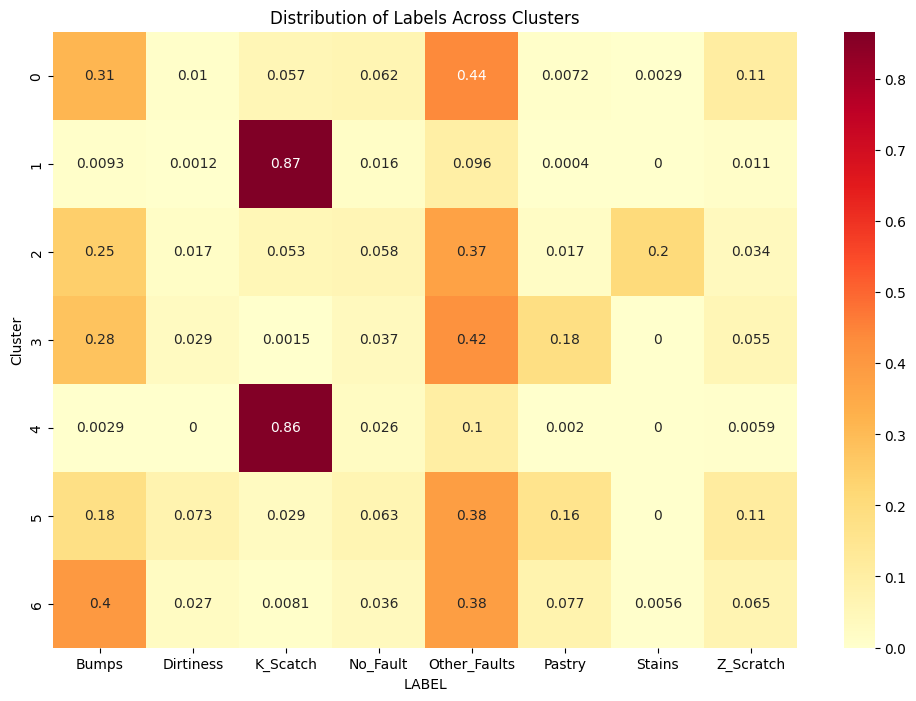

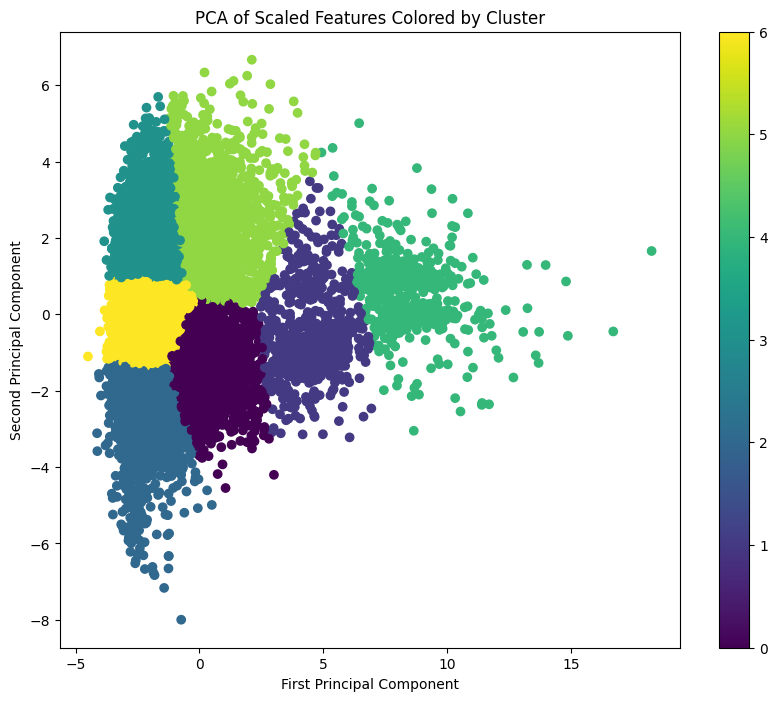

In [103]:
# Add cluster labels to the DataFrame
df_train['Cluster'] = clusters_train

# Analyze how the clusters relate to the LABEL
cluster_label_distribution = pd.crosstab(df_train['Cluster'], df_train['LABEL'], normalize='index')
print("\nCluster-Label Distribution:")
print(cluster_label_distribution)

# Visualize the results
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_label_distribution, annot=True, cmap='YlOrRd')
plt.title('Distribution of Labels Across Clusters')
plt.show()

# Optional: Scatter plot of PCA results colored by cluster
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_train, cmap='viridis')
plt.title('PCA of Scaled Features Colored by Cluster')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar(scatter)
plt.show()

Cluster to LABEL mapping:
Cluster
0    Other_Faults
1        K_Scatch
2    Other_Faults
3    Other_Faults
4        K_Scatch
5    Other_Faults
6           Bumps
dtype: object


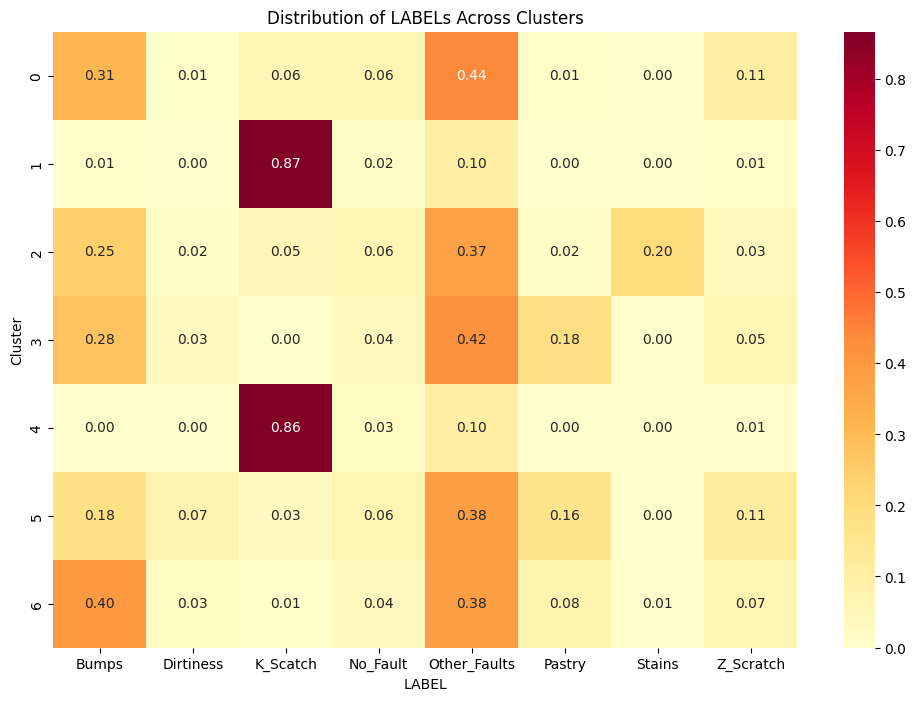


Detailed Cluster to LABEL mapping (top 3 LABELs with percentages):
Cluster
0    Other_Faults (43.89%), Bumps (31.44%), Z_Scrat...
1    K_Scatch (86.63%), Other_Faults (9.58%), No_Fa...
2    Other_Faults (37.15%), Bumps (24.52%), Stains ...
3    Other_Faults (41.69%), Bumps (27.79%), Pastry ...
4    K_Scatch (86.01%), Other_Faults (10.27%), No_F...
5    Other_Faults (38.44%), Bumps (17.76%), Pastry ...
6    Bumps (39.88%), Other_Faults (38.25%), Pastry ...
dtype: object

Sample of data points with original LABEL and Mapped_LABEL:
              LABEL  Cluster  Mapped_LABEL
15308  Other_Faults        3  Other_Faults
8570      Dirtiness        6         Bumps
8589   Other_Faults        3  Other_Faults
17146  Other_Faults        3  Other_Faults
12514      K_Scatch        4      K_Scatch
7602   Other_Faults        3  Other_Faults
1588   Other_Faults        6         Bumps
8964      Z_Scratch        0  Other_Faults
16703      K_Scatch        1      K_Scatch
18905         Bumps        6      

In [104]:
# Calculate the frequency of each LABEL within each cluster
label_frequency = df_train.groupby('Cluster')['LABEL'].value_counts(normalize=True).unstack().fillna(0)

# Function to find the most common LABEL(s) for each cluster
def get_top_labels(row, threshold=0.5):
    sorted_labels = row.sort_values(ascending=False)
    top_labels = sorted_labels[sorted_labels >= threshold]
    if top_labels.empty:
        return sorted_labels.index[0]  # Return the most common label if none meet the threshold
    return ', '.join(top_labels.index)

# Apply the function to get the most common LABEL(s) for each cluster
cluster_mapping = label_frequency.apply(get_top_labels, axis=1)

# Print the mapping
print("Cluster to LABEL mapping:")
print(cluster_mapping)

# Visualize the results
plt.figure(figsize=(12, 8))
sns.heatmap(label_frequency, annot=True, cmap='YlOrRd', fmt='.2f')
plt.title('Distribution of LABELs Across Clusters')
plt.show()

# Create a more detailed mapping including percentages
detailed_mapping = label_frequency.apply(lambda row: ', '.join([f"{label} ({value:.2%})" for label, value in row.nlargest(3).items()]), axis=1)

print("\nDetailed Cluster to LABEL mapping (top 3 LABELs with percentages):")
print(detailed_mapping)

# Optional: Create a function to assign the most likely LABEL to each data point
def assign_label(cluster, mapping=cluster_mapping):
    return mapping[cluster]

# Apply the function to create a new column with the mapped LABEL
df_train['Mapped_LABEL'] = df_train['Cluster'].apply(assign_label)

# Print a sample of the results
print("\nSample of data points with original LABEL and Mapped_LABEL:")
print(df_train[['LABEL', 'Cluster', 'Mapped_LABEL']].sample(10))

# Calculate accuracy of the mapping
accuracy = (df_train['LABEL'] == df_train['Mapped_LABEL']).mean()
print(f"\nAccuracy of the mapping: {accuracy:.2%}")

### Use the Clustering-Label Distributions on the Test data

In [108]:
# PCA transformation
X_test_pca = pca.transform(X_test_scaled)

# Predict clusters for the test data
clusters_test = kmeans.predict(X_test_pca)

# Use the cluster-label distribution to assign probabilities
predicted_probabilities = cluster_label_distribution.loc[clusters_test].reset_index(drop=True)

# Construct the final DataFrame
output_df = pd.DataFrame({
    'id': df_test['id']
})

# Append the predicted probabilities to the output DataFrame
output_df = pd.concat([output_df, predicted_probabilities], axis=1)
print(output_df.head())
print(len(df_test))
print(len(output_df))

      id     Bumps  Dirtiness  K_Scatch  No_Fault  Other_Faults    Pastry  \
0  19219  0.002935   0.000000  0.860078  0.026419      0.102740  0.001957   
1  19220  0.002935   0.000000  0.860078  0.026419      0.102740  0.001957   
2  19221  0.398844   0.026782  0.008092  0.036224      0.382466  0.076686   
3  19222  0.245233   0.016781  0.053394  0.058352      0.371472  0.017162   
4  19223  0.245233   0.016781  0.053394  0.058352      0.371472  0.017162   

     Stains  Z_Scratch  
0  0.000000   0.005871  
1  0.000000   0.005871  
2  0.005588   0.065318  
3  0.203280   0.034325  
4  0.203280   0.034325  
12814
12814


In [89]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Splitting the features and target in the training data
X_train = df_train.drop(features_to_scale)
y_train = df_train['LABEL']

# Prepare the test data features
X_test = df_test

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

KeyError: "['id', 'X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity', 'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer', 'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness', 'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index', 'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas', 'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index', 'SigmoidOfAreas', 'Cluster'] not found in axis"

# Reference

# Conclusion

Utilised Supervised Learning would be a better option for this data problem. I could also have used more principal components to obtain a greater 'variance explained'. But this was a fun way to practice some PCA and k-means clustering on some interesting data!